# EDA of Switzerland data

In [4]:
import covsirphy as cs
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import seaborn as sns
import pandas as pd
import sys

In [5]:
kaggle_path = sys.path[0] + '/../kaggle/input'
loader = cs.DataLoader(directory=kaggle_path)
jhu_data = loader.jhu()

In [4]:
# total dataframe
total_df = jhu_data.total()
total_df.head()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-01-01,0,0,0,0,NaN,NaN,NaN
2020-01-02,1,0,0,1,0.0,1.0,0.0
2020-01-03,0,0,0,0,NaN,NaN,NaN
2020-01-04,1,1,0,0,0.0,0.0,NaN
2020-01-05,1,1,0,0,0.0,0.0,NaN


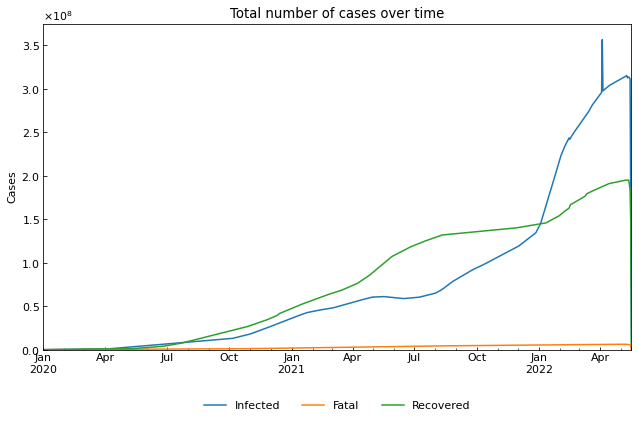

In [5]:
# cs.line_plot() funtion
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

In [6]:
# statistics of fatality rate and recovery rate
total_df.loc[:, total_df.columns.str.contains("per")].describe().T

,count,mean,std,min,25%,50%,75%,max
Fatal per Confirmed,866.0,0.026410,0.013167,0.0,0.020358,0.021661,0.030058,0.065203
Recovered per Confirmed,866.0,0.463894,0.181171,0.0,0.386185,0.550966,0.580014,1.000000
Fatal per (Fatal or Recovered),858.0,0.116331,0.218017,0.0,0.033764,0.036694,0.061082,1.000000


In [7]:
# avg recovery period
recovery_period = jhu_data.calculate_recovery_period()
print(f"Average recovery period: {recovery_period} [days]")

Average recovery period: 15 [days]


In [8]:
# check of raw data
mask_country = (jhu_data.raw['Country'] == 'Switzerland')
jhu_data.raw.loc[mask_country].tail()

,Date,ISO3,Country,Province,Confirmed,Infected,Fatal,Recovered,Population
1063279,2022-05-09,CHE,Switzerland,Zurich,629142.0,NaN,1778.0,NaN,1504300.0
1063280,2022-05-10,CHE,Switzerland,Zurich,629143.0,NaN,1778.0,NaN,1504300.0
1063281,2022-05-11,CHE,Switzerland,Zurich,629143.0,NaN,1778.0,NaN,1504300.0
1063282,2022-05-12,CHE,Switzerland,Zurich,NaN,NaN,NaN,NaN,NaN
1063283,2022-05-13,CHE,Switzerland,Zurich,NaN,NaN,NaN,NaN,NaN


In [9]:
# check of cleaned data
mask_country = (jhu_data.cleaned()['Country'] == 'Switzerland')
sui_df = jhu_data.cleaned().loc[mask_country]
sui_df.tail()

,Date,ISO3,Country,Province,Confirmed,Infected,Fatal,Recovered,Population
1063279,2022-05-09,CHE,Switzerland,Zurich,629142,627364,1778,0,1504300
1063280,2022-05-10,CHE,Switzerland,Zurich,629143,627365,1778,0,1504300
1063281,2022-05-11,CHE,Switzerland,Zurich,629143,627365,1778,0,1504300
1063282,2022-05-12,CHE,Switzerland,Zurich,629143,627365,1778,0,1504300
1063283,2022-05-13,CHE,Switzerland,Zurich,629143,627365,1778,0,1504300


In [10]:
# info
sui_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26210 entries, 1037074 to 1063283
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        26210 non-null  datetime64[ns]
 1   ISO3        26210 non-null  category      
 2   Country     26210 non-null  category      
 3   Province    26210 non-null  category      
 4   Confirmed   26210 non-null  int64         
 5   Infected    26210 non-null  int64         
 6   Fatal       26210 non-null  int64         
 7   Recovered   26210 non-null  int64         
 8   Population  26210 non-null  int64         
dtypes: category(3), datetime64[ns](1), int64(5)
memory usage: 1.6 MB


In [11]:
sui_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,26210.0,51592.476726,2.295394e+05,0.0,196.25,4828.0,30972.25,3631884.0
Infected,26210.0,41213.299046,1.973344e+05,-20.0,113.00,2397.0,22526.75,3301067.0
Fatal,26210.0,465.077642,1.525177e+03,0.0,6.00,69.0,360.00,13217.0
Recovered,26210.0,9914.100038,4.648215e+04,0.0,0.00,0.0,689.00,317600.0
Population,26210.0,535538.599008,1.488590e+06,0.0,37600.00,178000.0,353700.00,8513227.0


<AxesSubplot:ylabel='Density'>

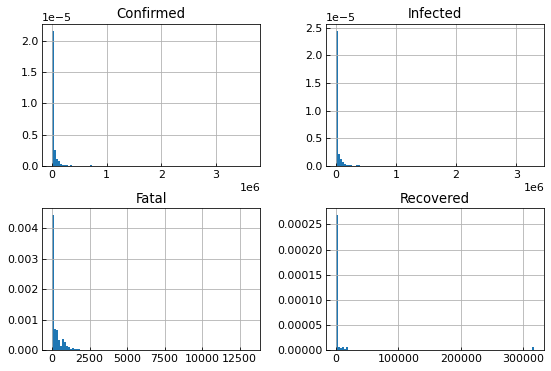

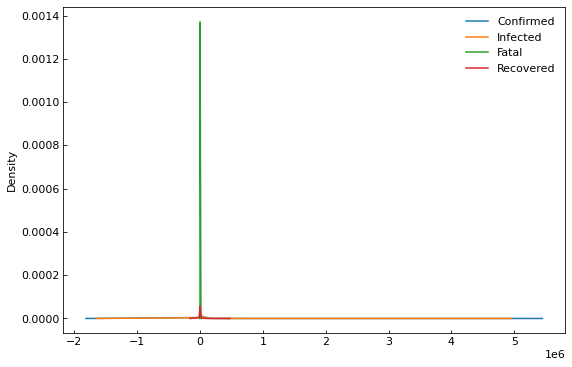

In [13]:
sui_hist = sui_df[['Confirmed', 'Infected', 'Fatal', 'Recovered']]
sui_hist.hist(bins = 100, density = True)
sui_hist.plot.kde()

### Subset for an area

In [18]:
# Specify country name
df_sui, complement = jhu_data.records("Switzerland") # skipping of auto complementation of data with auto_complement = FalsE
# Or, specify ISO3 code
# df, complement = jhu_data.records("SUI")
df_sui = df_sui.set_index('Date')
display(df_sui.tail())
# Show records
# display(df_sui.tail())
display(df_sui.describe().T)
# Show details of complement
print(complement)

,Confirmed,Infected,Fatal,Recovered,Susceptible
Date,,,,,
2022-05-06,3628156,34513,13216,3580427,4885071
2022-05-07,3629331,32537,13216,3583578,4883896
2022-05-08,3630141,31327,13217,3585597,4883086
2022-05-09,3631881,31540,13217,3587124,4881346
2022-05-10,3631884,27666,13217,3591001,4881343


,count,mean,std,min,25%,50%,75%,max
Confirmed,799.0,8.388486e+05,988880.810038,119.0,50129.0,610859.0,861441.0,3631884.0
Infected,799.0,6.972716e+04,113106.007263,117.0,6963.5,22233.0,77402.0,528932.0
Fatal,799.0,7.600678e+03,4465.903996,0.0,1815.5,9982.0,10794.0,13217.0
Recovered,799.0,7.615208e+05,914853.744097,2.0,40700.0,574494.0,835226.5,3591001.0
Susceptible,799.0,7.674378e+06,988880.810038,4881343.0,7651786.0,7902368.0,8463098.0,8513108.0


partially complemented recovered data


In [14]:
# province names

cantons = []

for canton in jhu_data.layer(country = 'Switzerland')['Province']:
    if canton not in cantons:
        cantons.append(canton)
        
print('canton names:', cantons)

canton names: ['Aargau', 'Appenzell Ausserrhoden', 'Appenzell Innerrhoden', 'Basel-Landschaft', 'Basel-Stadt', 'Baselland', 'Bern', 'Fribourg', 'Geneva', 'Geneve', 'Glarus', 'Graubunden', 'Grisons', 'Jura', 'Lucerne', 'Luzern', 'Neuchatel', 'Nidwalden', 'Obwalden', 'Schaffhausen', 'Schwyz', 'Solothurn', 'St. Gallen', 'St.Gallen', 'Thurgau', 'Ticino', 'Uri', 'Valais', 'Vaud', 'Zug', 'Zurich']


In [39]:
df_bern ,_  = jhu_data.records("Switzerland", province="Bern")
df_zurich, _ = jhu_data.records("Switzerland", province="Zurich") # find out how to see possible provinces?
df_geneva, _ = jhu_data.records("Switzerland", province="Geneve") # no records > 0 in Geneva
df_graubunden, _ = jhu_data.records("Switzerland", province="Graubunden") # no records > 0 in Geneva
df_app_inner, _ = jhu_data.records("Switzerland", province="Appenzell Innerrhoden") 

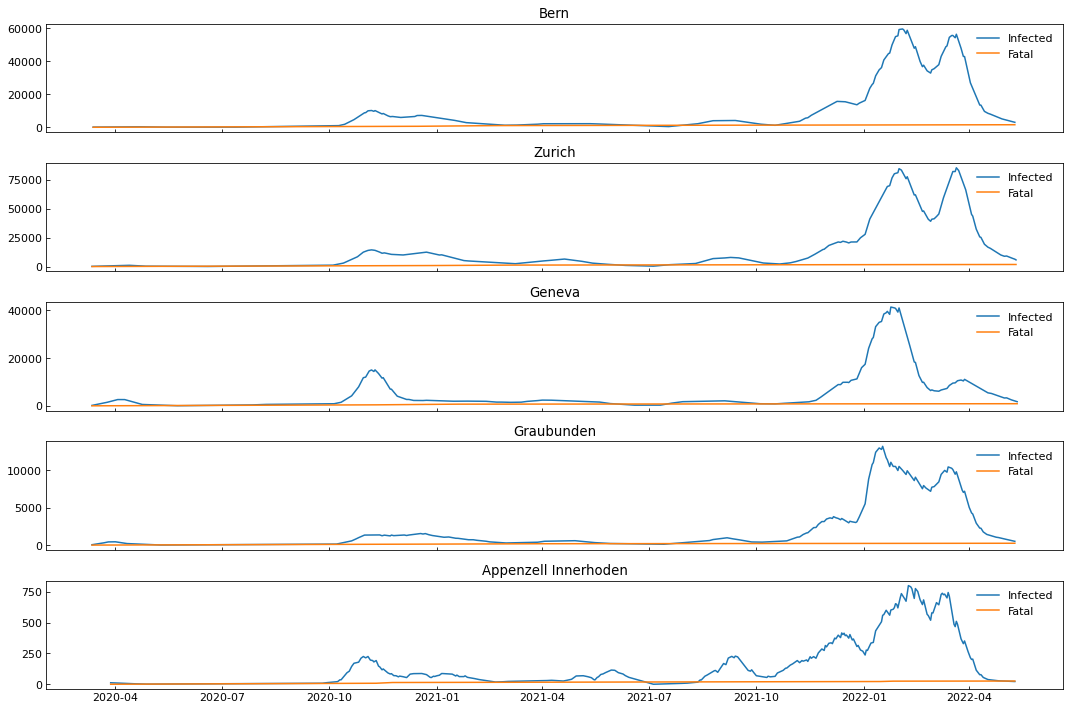

In [46]:
# comparison of swiss cantons

canton_frames = [df_bern, df_zurich, df_geneva, df_graubunden, df_app_inner]
canton_names = ['Bern', 'Zurich', 'Geneva', 'Graubunden', 'Appenzell Innerhoden']

fig, axs = plt.subplots(len(canton_names),1, figsize = (15,10), sharex = True)
for i, df in enumerate(canton_frames):
    
    axs[i].plot(df['Date'], df["Infected"], label = 'Infected')
    axs[i].plot(df['Date'], df['Fatal'], label = 'Fatal')
    axs[i].set_title(canton_names[i])
    axs[i].legend()
    
plt.tight_layout()

In [28]:
# map of data on province level

# jhu_data.map(country="Switzerland", variable="Infected")
# To set included/exclude some countries
# jhu_data.map(country="Switzerland", variable="Infected", included=["Zurich"])
# jhu_data.map(country="Switzerland", variable="Infected")#, excluded=["Bern", 'Zurich'])
# To change the date
# jhu_data.map(country="Switzerland", variable="Infected", date="01Oct2021")

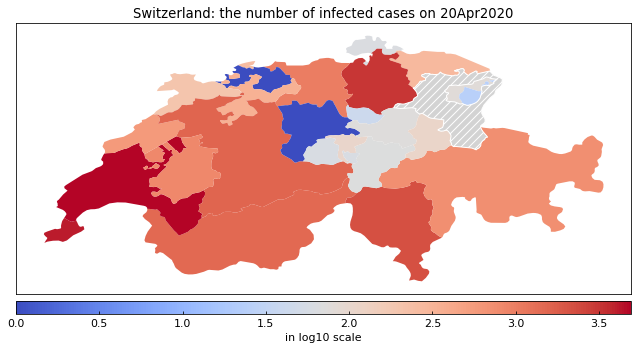

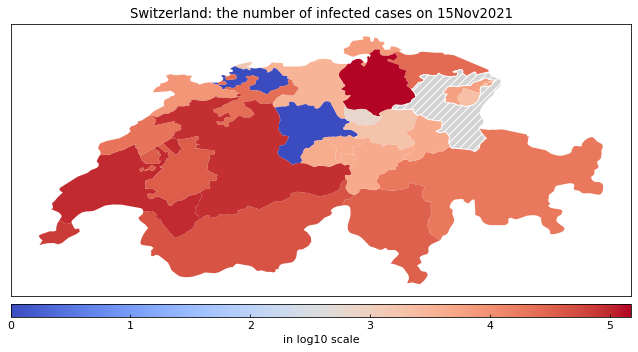

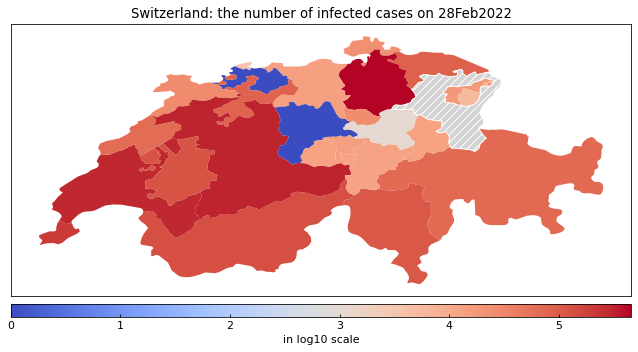

In [32]:
jhu_data.map(country="Switzerland", variable="Infected", date="20Apr2020")
jhu_data.map(country="Switzerland", variable="Infected", date="15Nov2021")
jhu_data.map(country="Switzerland", variable="Infected", date="28Feb2022")

In [43]:
# values of map

jhu_data.layer(country="Switzerland").tail()

,Date,ISO3,Country,Province,Confirmed,Infected,Fatal,Recovered,Population
25147,2022-05-02,CHE,Switzerland,Zurich,626243,624469,1774,0,1504300
25148,2022-05-03,CHE,Switzerland,Zurich,626245,624471,1774,0,1504300
25149,2022-05-04,CHE,Switzerland,Zurich,626245,624471,1774,0,1504300
25150,2022-05-05,CHE,Switzerland,Zurich,626245,624471,1774,0,1504300
25151,2022-05-06,CHE,Switzerland,Zurich,626245,624471,1774,0,1504300


### OxCGRT indicators

school_closing,
workplace_closing,
cancel_events,
gatherings_restrictions,
transport_closing,
stay_home_restrictions,
internal_movement_restrictions,
international_movement_restrictions,
information_campaigns,
testing_policy,
contact_tracing.

In [19]:
oxcgrt_data = loader.oxcgrt()
type(oxcgrt_data)

covsirphy.cleaning.oxcgrt.OxCGRTData

In [20]:
# Description
print(oxcgrt_data.citation)
# Raw
display(oxcgrt_data.raw.tail())
# cleaned
oxcgrt_data.cleaned().tail()

,Date,ISO3,Country,Province,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
1283376,2022-05-11,ZWE,Zimbabwe,-,2.0,2.0,1.0,3.0,NaN,2.0,2.0,1.0,2.0,3.0,NaN,61.11
1283377,2022-05-12,ZWE,Zimbabwe,-,2.0,2.0,1.0,3.0,NaN,2.0,2.0,1.0,2.0,3.0,NaN,61.11
1283378,2022-05-13,ZWE,Zimbabwe,-,2.0,2.0,1.0,3.0,NaN,2.0,2.0,1.0,2.0,3.0,NaN,61.11
1283379,2022-05-14,ZWE,Zimbabwe,-,2.0,2.0,1.0,3.0,NaN,2.0,2.0,1.0,2.0,3.0,NaN,61.11
1283380,2022-05-15,ZWE,Zimbabwe,-,2.0,2.0,1.0,3.0,NaN,2.0,2.0,1.0,2.0,3.0,NaN,61.11


,Date,ISO3,Country,Province,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
1287661,2022-01-15,GRL,Greenland,Syddanmark,1.0,2.0,1.0,2.0,1.0,1.0,-1.0,2.0,2.0,3.0,2.0,-38.89
1287662,2022-01-16,GRL,Greenland,Syddanmark,1.0,2.0,1.0,2.0,1.0,1.0,-1.0,2.0,2.0,3.0,2.0,-38.89
1287663,2022-01-17,GRL,Greenland,Syddanmark,1.0,2.0,1.0,2.0,1.0,1.0,-1.0,2.0,2.0,3.0,2.0,-38.89
1287664,2022-01-18,GRL,Greenland,Syddanmark,1.0,2.0,1.0,2.0,1.0,1.0,-1.0,2.0,2.0,3.0,2.0,-38.89
1287665,2022-01-19,GRL,Greenland,Syddanmark,1.0,2.0,1.0,2.0,1.0,1.0,-1.0,2.0,2.0,3.0,2.0,-38.89


In [21]:
oxcgrt_sui = oxcgrt_data.subset('Switzerland')
oxcgrt_sui = oxcgrt_sui.set_index('Date', inplace = False, drop = True)
oxcgrt_sui.tail()

,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Date,,,,,,,,,,,,
2022-05-06,2.0,1.0,2.0,4.0,1.0,1.0,1.0,3.0,2.0,2.0,1.0,8.33
2022-05-07,2.0,1.0,2.0,4.0,1.0,1.0,1.0,3.0,2.0,2.0,1.0,8.33
2022-05-08,2.0,1.0,2.0,4.0,1.0,1.0,1.0,3.0,2.0,2.0,1.0,8.33
2022-05-09,2.0,1.0,2.0,4.0,1.0,1.0,1.0,3.0,2.0,2.0,1.0,8.33
2022-05-10,2.0,1.0,2.0,4.0,1.0,1.0,1.0,3.0,2.0,2.0,1.0,8.33


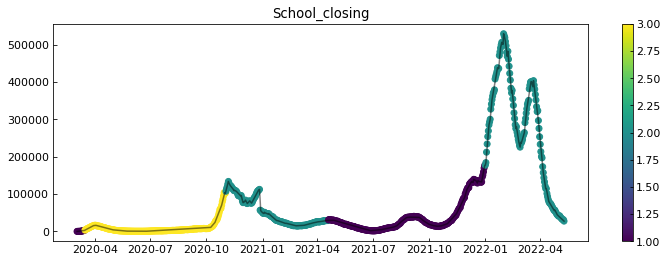

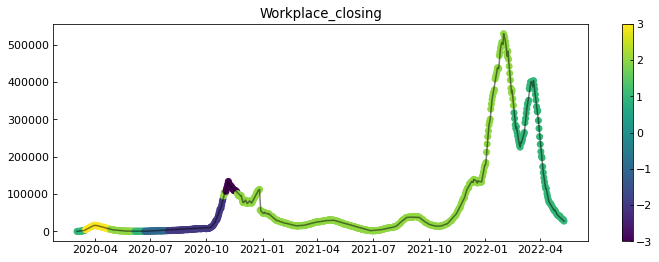

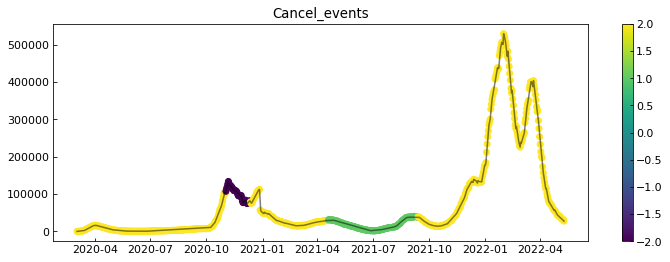

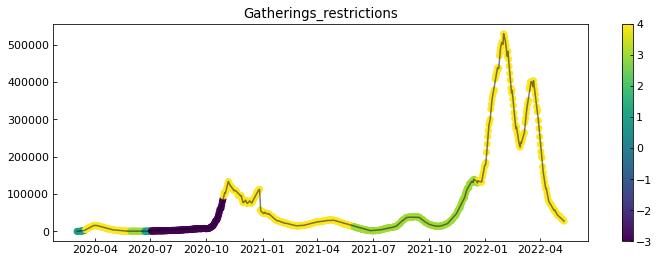

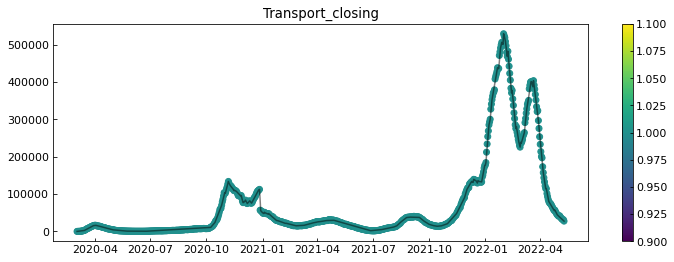

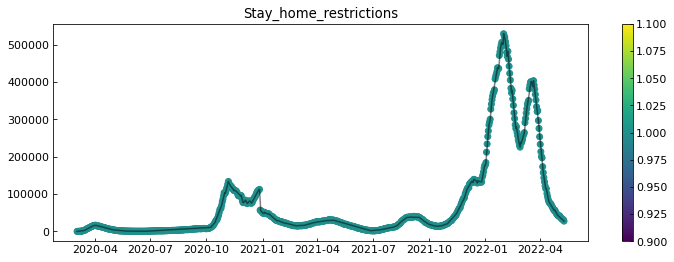

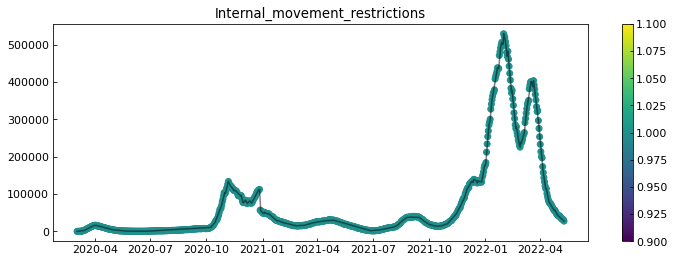

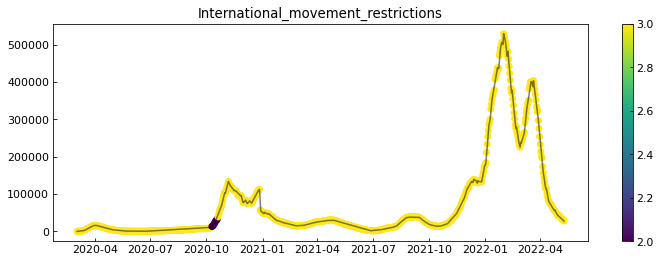

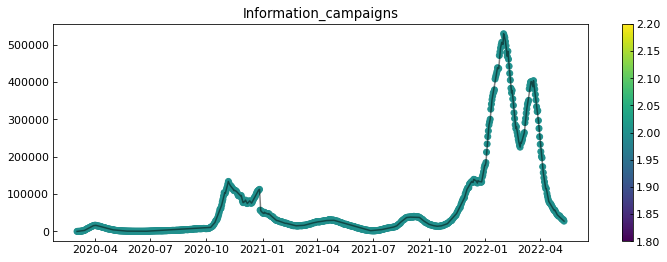

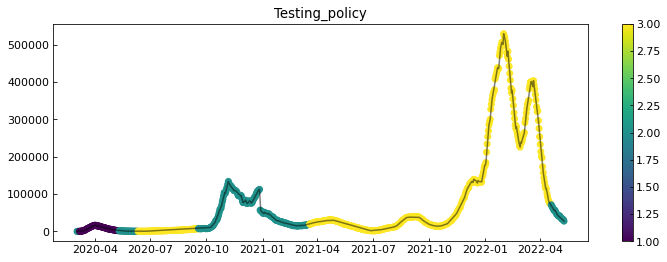

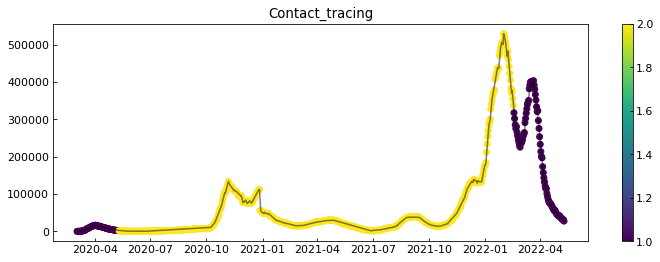

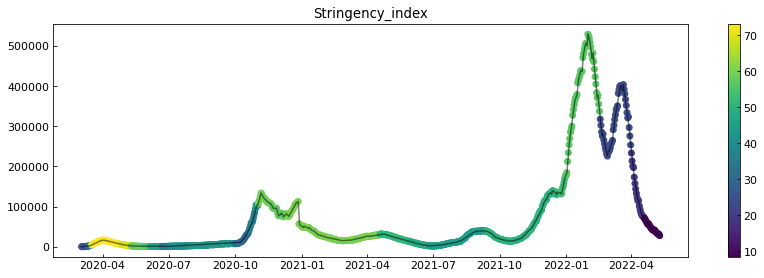

In [33]:
oxcgrt_sui = oxcgrt_sui[oxcgrt_sui.index >= min(df_sui.index)]


# fig, axs = plt.subplots(len(oxcgrt_sui.columns), 1, sharex = True) # figsize = (15,5))

for i, col in enumerate(oxcgrt_sui.columns):
    
    plt.figure(figsize = (12, 4))
    plt.plot(df_sui.index, df_sui['Infected'], c = 'black', alpha = .5)
    plt.scatter(df_sui.index, df_sui['Infected'], c = oxcgrt_sui[col].astype('category'))
    
    plt.title(col)
    plt.colorbar()

plt.tight_layout()

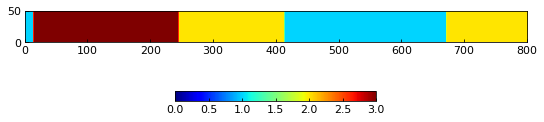

In [180]:
length_track = len(oxcgrt_sui.index)
x = np.array(oxcgrt_sui.index)
y = np.array(oxcgrt_sui['School_closing']).reshape(1, length_track)
# heatmap, xedges, yedges = np.histogram2d(x, y, bins=(np.linspace(0,length_track,length_track+1),1))
extent = [0, length_track+1, 0, 50]
col = plt.imshow(y, extent=extent, origin='lower', cmap='jet',vmin=0,vmax=None)
plt.colorbar(mappable = col, shrink = 0.4, orientation = 'horizontal') #location = 'right')
# np.shape(heatmap.T)
# plt.imshow(np.array(oxcgrt_sui['School_closing']).reshape(1, 840), cmap = 'jet')

# oxcgrt_sui.set_index('Date')
# oxcgrt_sui.tail()
#np.shape(np.array(oxcgrt_sui['School_closing']).reshape(840))

In [23]:
dates = oxcgrt_sui.index

In [ ]:
# cell for saving a map
# for date in dates:
#    oxcgrt_data.map(Variable =  'Stringency_index', date = date, filename = 'Stringency_Index_Maps/' + str(date).split()[0])

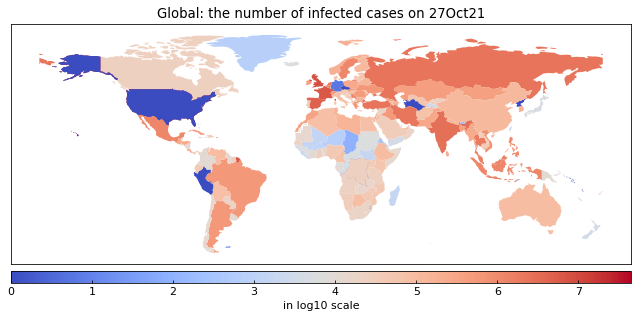

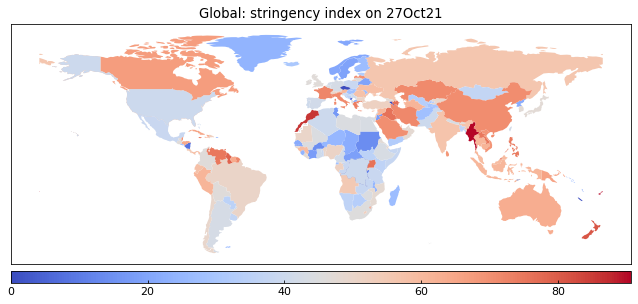

In [25]:
# visualize data in map
# show date before and after wave
# before
jhu_data.map( variable = 'Infected', date = '27Oct21')
oxcgrt_data.map(variable = 'Stringency_index', date = '27Oct21')

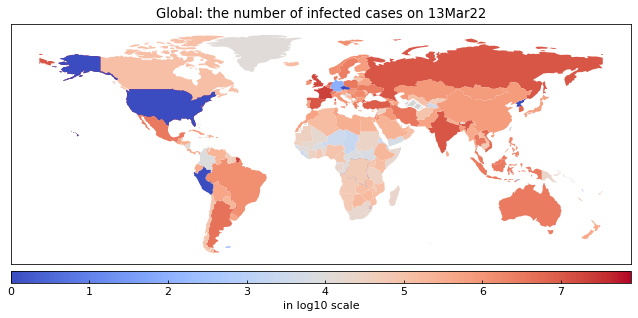

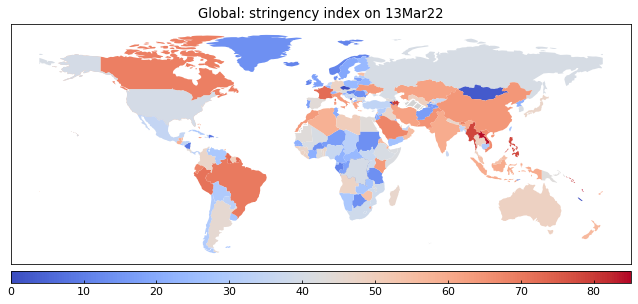

In [26]:
# after
jhu_data.map( variable = 'Infected', date = '13Mar22')
oxcgrt_data.map(variable = 'Stringency_index', date = '13Mar22')

### Implementation of Maps

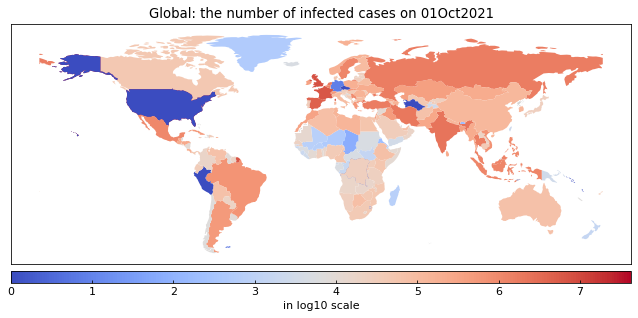

In [29]:
# global map, country unspecified

# jhu_data.map(country=None, variable="Infected") # wihtout a specified date it takes last available timestamp
# To set included/exclude some countries
# jhu_data.map(country=None, variable="Infected", included=["Japan"])
# jhu_data.map(country=None, variable="Infected", excluded=["Japan"])
# To change the date
jhu_data.map(country=None, variable="Infected", date="01Oct2021")

### PCR data

In [8]:
pcr_data = loader.pcr()
type(pcr_data)

covsirphy.cleaning.pcr_data.PCRData

In [9]:
# cleaned data set, .raw for raw
pcr_data.cleaned()

,Date,Country,Province,Tests,Confirmed
738,2022-01-29,Afghanistan,-,853003,161290
739,2022-01-30,Afghanistan,-,853003,162111
740,2022-01-31,Afghanistan,-,853003,162926
741,2022-02-01,Afghanistan,-,853003,163555
742,2022-02-02,Afghanistan,-,853003,164190
...,...,...,...,...,...
1285451,2022-05-13,Zimbabwe,-,2278641,249131
1285452,2022-05-14,Zimbabwe,-,2278641,249206
1285453,2022-05-15,Zimbabwe,-,2287793,249206
1285454,2022-05-16,Zimbabwe,-,2287793,249431


In [10]:
pcr_data.subset('Switzerland').head(5)

,Date,Tests,Tests_diff,Confirmed
0,2020-05-23,2512,0,30711
1,2020-05-24,4166,1654,30721
2,2020-05-25,8043,3877,30736
3,2020-05-26,13625,5582,30754
4,2020-05-27,18533,4908,30779


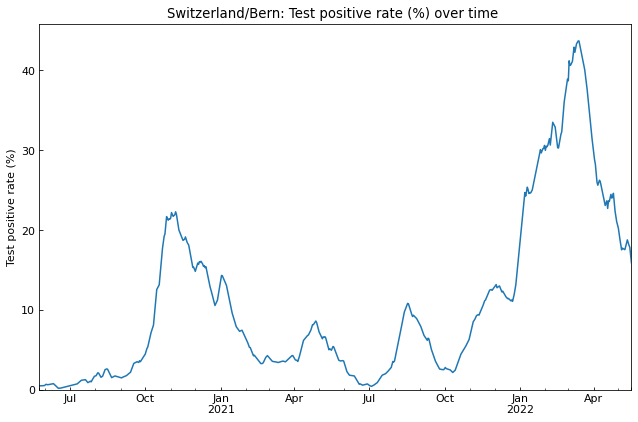

,Date,ISO3,Country,Province,Tests,Confirmed,Tests_diff,Confirmed_diff,Test_positive_rate
0,2020-05-24,CHE,Switzerland,Bern,381,1871,334.571429,1.571429,0.469684
1,2020-05-25,CHE,Switzerland,Bern,725,1872,334.571429,1.571429,0.469684
2,2020-05-26,CHE,Switzerland,Bern,1140,1872,334.571429,1.571429,0.469684
3,2020-05-27,CHE,Switzerland,Bern,1489,1874,334.571429,1.571429,0.469684
4,2020-05-28,CHE,Switzerland,Bern,1884,1876,334.571429,1.571429,0.469684
...,...,...,...,...,...,...,...,...,...
719,2022-05-13,CHE,Switzerland,Bern,2473514,413831,1117.000000,202.428571,18.122522
720,2022-05-14,CHE,Switzerland,Bern,2474294,413943,1099.714286,198.857143,18.082619
721,2022-05-15,CHE,Switzerland,Bern,2474806,414032,1086.285714,193.714286,17.832720
722,2022-05-16,CHE,Switzerland,Bern,2475727,414172,1027.428571,172.714286,16.810345


In [11]:
# cantoncomparison
pcr_data.positive_rate(country = 'Switzerland', province = 'Bern')

### Vaccination data

Variables:

Vaccinations: cumulative number of vaccinations

Vaccinations_boosters: cumulative number of booster vaccinations

Vaccinated_once: cumulative number of people who received at least one vaccine dose

Vaccinated_full: cumulative number of people who received all doses prescribed by the protocol

In [ ]:
vaccine_data = loader.vaccine()

In [73]:
_ = vaccine_data.cleaned().tail()

In [75]:
_ = vaccine_data.subset('Switzerland')

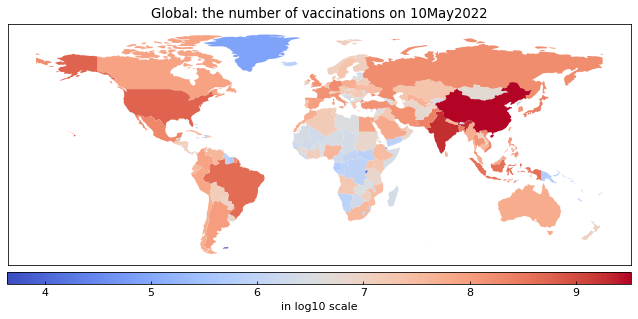

In [76]:
vaccine_data.map()

In [77]:
# values for map

_ = vaccine_data.layer().head()

### Mobility Data

In [191]:
mobility_data = loader.mobility()

In [194]:
mobility_data.cleaned().tail()

,Date,ISO3,Country,Province,Mobility_grocery_and_pharmacy,Mobility_parks,Mobility_transit_stations,Mobility_retail_and_recreation,Mobility_residential,Mobility_workplaces
1278563,2022-05-06,ZWE,Zimbabwe,-,214,273,211,207,111,181
1278564,2022-05-07,ZWE,Zimbabwe,-,226,305,231,217,110,197
1278565,2022-05-08,ZWE,Zimbabwe,-,245,348,248,244,112,223
1278566,2022-05-09,ZWE,Zimbabwe,-,209,312,216,201,115,177
1278567,2022-05-10,ZWE,Zimbabwe,-,219,299,218,204,114,180


##### Note for variables

Definition of variables are as follows.

Mobility_grocery_and_pharmacy (int): % to baseline in visits (grocery markets, pharmacies etc.)

Mobility_parks (int): % to baseline in visits (parks etc.)

Mobility_transit_stations (int): % to baseline in visits (public transport hubs etc.)

Mobility_retail_and_recreation (int): % to baseline in visits (restaurant, museums etc.)

Mobility_residential (int): % to baseline in visits (places of residence)

Mobility_workplaces (int): % to baseline in visits (places of work)

In [85]:
mobility_data.subset('Switzerland').head()

,Date,Mobility_grocery_and_pharmacy,Mobility_parks,Mobility_transit_stations,Mobility_retail_and_recreation,Mobility_residential,Mobility_workplaces


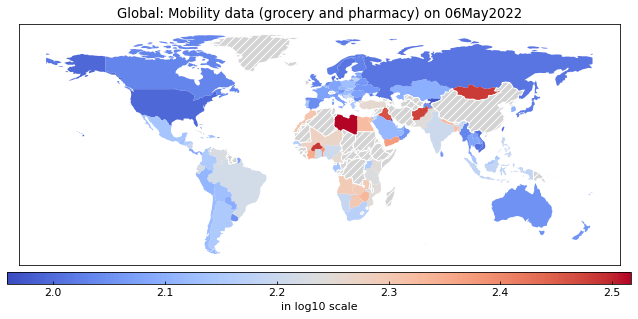

In [97]:
mobility_data.map()

### Pyramid data

useful for analysing paramters and influence on difference groups

In [196]:
pyramid_data = loader.pyramid()

In [318]:
pyramid_data.subset('Switzerland')

,Age,Population,Per_total
0,0,90176,0.010976
1,1,90176,0.010976
2,2,90176,0.010976
3,3,90176,0.010976
4,4,90176,0.010976
...,...,...,...
113,118,10657,0.001297
114,119,10657,0.001297
115,120,10657,0.001297
116,121,10657,0.001297
